In [8]:
import csv
import random
from shutil import copyfile
from pycocotools.coco import COCO
from tqdm import tqdm

In [9]:
#make directory and get annotations for training and testing
!mkdir data
!wget http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip -P ./data/
!unzip ./data/captions_train-val2014.zip -d ./data/
!rm ./data/captions_train-val2014.zip

--2020-02-23 21:21:06--  http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip
Resolving web.ucsd.edu (web.ucsd.edu)... 132.239.1.231, 132.239.1.230
Connecting to web.ucsd.edu (web.ucsd.edu)|132.239.1.231|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 19673183 (19M) [application/octet-stream Charset=UTF-8]
Saving to: ‘./data/captions_train-val2014.zip’

captions_train-val2 100%[===================>]  18.76M  --.-KB/s    in 0.07s   

2020-02-23 21:21:07 (254 MB/s) - ‘./data/captions_train-val2014.zip’ saved [19673183/19673183]

Archive:  ./data/captions_train-val2014.zip
  inflating: ./data/annotations/captions_train2014.json  
  inflating: ./data/annotations/captions_val2014.json  


In [10]:
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test

In [11]:
coco = COCO('./data/annotations/captions_train2014.json')

loading annotations into memory...
Done (t=1.02s)
creating index...
index created!


In [12]:
#get ids of training images
with open('train_ids.csv', 'r') as f:
    reader = csv.reader(f)
    trainIds = list(reader)
    
trainIds = [int(i) for i in trainIds[0]]

with open('val_ids.csv', 'r') as f:
    reader = csv.reader(f)
    valIds = list(reader)
    
valIds = [int(i) for i in valIds[0]]

In [13]:
for img_id in trainIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/train/'+path)
for img_id in valIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/val/'+path)

In [14]:
cocoTest = COCO('./data/annotations/captions_val2014.json')

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [15]:
with open('TestImageIds.csv', 'r') as f:
    reader = csv.reader(f)
    testIds = list(reader)
    
testIds = [int(i) for i in testIds[0]]

In [16]:
for img_id in testIds:
    path = cocoTest.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/val2014/'+path, './data/images/test/'+path)

In [17]:
print("done")

done


## Inspect Trained Model

Device:  cuda
loading annotations into memory...
Done (t=0.78s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
Using the saved vocab.
loading annotations into memory...
Done (t=0.70s)
creating index...
index created!
loading annotations into memory...
Done (t=0.77s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


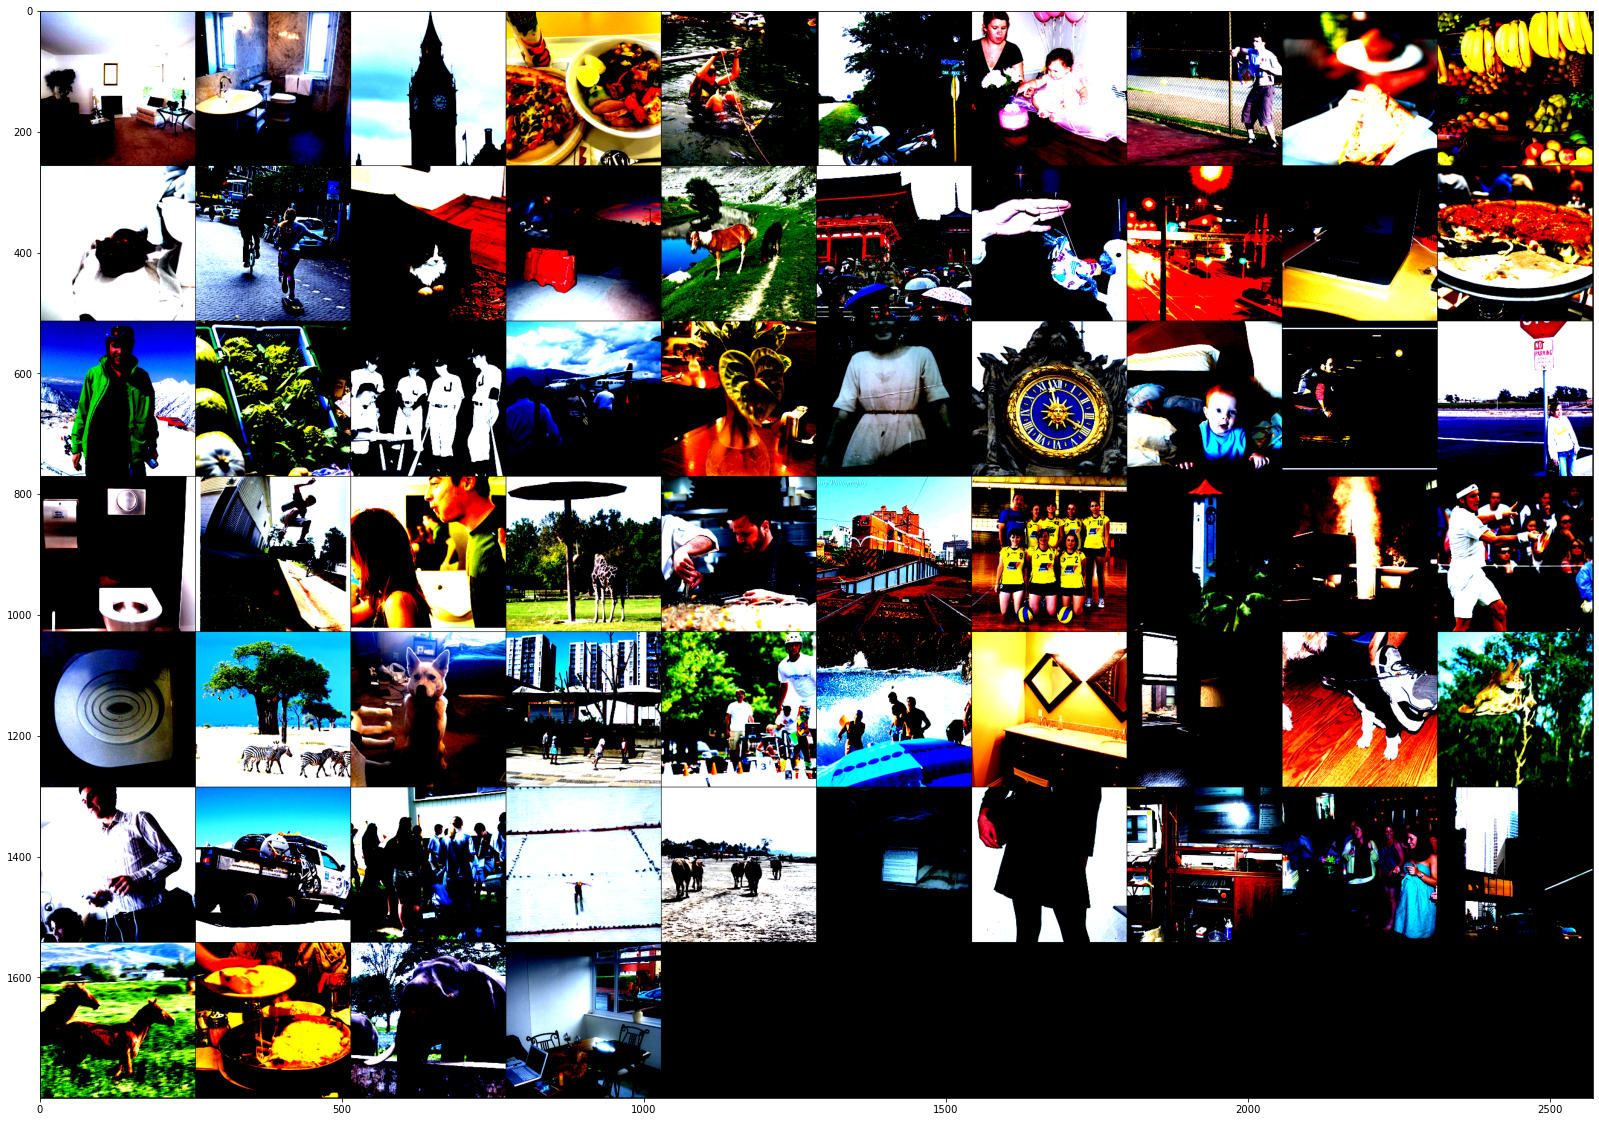

loading annotations into memory...
Done (t=0.69s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
Using the saved vocab.
loading annotations into memory...
Done (t=1.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


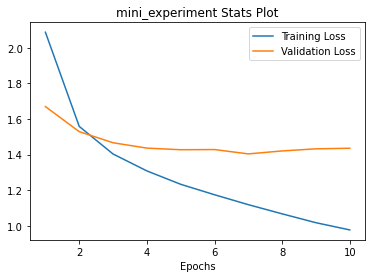

['<start> a living room with a couch , table and a television . <end> <pad> <pad> <pad> <pad> <pad> <pad>',
 '<start> a bathroom with a white toilet and a white tub <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>',
 '<start> a large clock tower with a wind indicator on the side of a road . <end> <pad> <pad> <pad>',
 '<start> a plate of food with a fork and a bowl of food on it <end> <pad> <pad> <pad> <pad>',
 '<start> a man is riding a surfboard in the water . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>',
 '<start> a man is riding a motorcycle with a dog behind him . <end> <pad> <pad> <pad> <pad> <pad> <pad>',
 '<start> a woman is sitting at a table with a cake on it . <end> <pad> <pad> <pad> <pad> <pad>',
 '<start> a man holding a tennis racquet on a tennis court . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad>',
 '<start> a sandwich and a pickle on a plate with a fork . <end> <pad> <pad> <pad> <pad> <pad> <pad>',
 '<start> a display of fruits and vegetables at a mark

In [1]:
from experiment import Experiment
import torch
import torchvision
from file_utils import *
import matplotlib.pyplot as plt
from constants import ROOT_STATS_DIR
from dataset_factory import get_datasets

exp_name = "mini"
config_data = read_file_in_dir('./', exp_name + '.json')
__name = config_data['experiment_name']
__experiment_dir = os.path.join(ROOT_STATS_DIR, __name)

# Load Datasets
__coco_test, __vocab, __train_loader, __val_loader, __test_loader = get_datasets(
            config_data)

for i, (images, captions, img_ids) in enumerate(__train_loader):
    break

grid_img = torchvision.utils.make_grid(images, nrow=10, padding=1)
plt.figure(figsize = (30,20))
plt.imshow(grid_img.permute(1, 2, 0).detach().numpy())
plt.show()

exp = Experiment(exp_name)
exp.plot_stats()
exp._Experiment__model.eval()
with torch.no_grad():
    res_caps = exp._Experiment__model.generate(images.cuda())
[' '.join([__vocab.idx2word[x.item()] for x in cap]) for cap in res_caps]

In [ ]:
from experiment import Experiment
from model_factory import generate_caption

exp_name = "rnn2"
exp = Experiment(exp_name)
generate_caption(exp, n=10)